# Fourier Transform

- We visualize the portion of the Fourier Transform - actually a Discrete Cosine Transform.


In [38]:
from typing import Callable

import numpy as np
from scipy.integrate import quad


def fourier_transform(
    func: Callable[[float], float], t_min: float, t_max: float, normalize: bool = False
) -> Callable[[float], float]:
    def func_with_hat(f: float) -> float:
        integrand = lambda t: func(t) * np.exp(-2j * np.pi * f * t)
        integral: complex = quad(integrand, t_min, t_max, complex_func=True)[0]
        if normalize:
            integral /= t_max - t_min
        return integral.real

    return func_with_hat

Manim Community v0.18.1

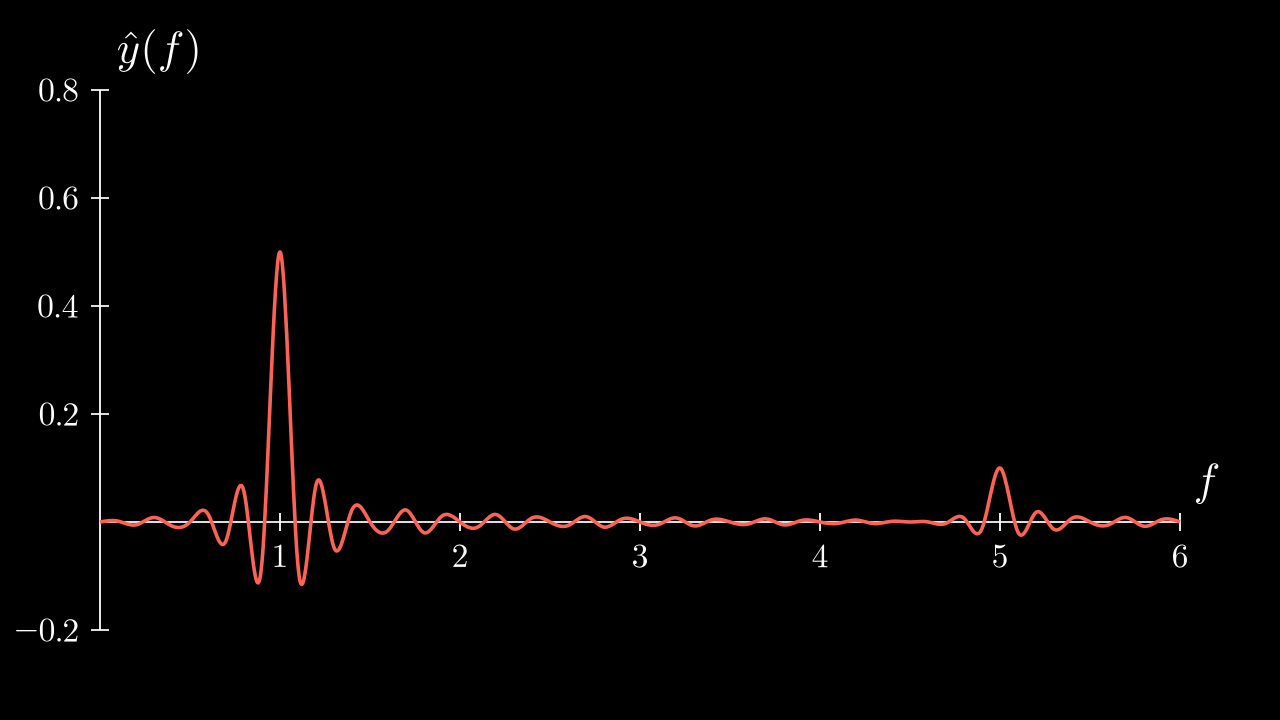

In [50]:
from manim import *

class FreqDomainPlot(Scene):
    def construct(self):

        # Define the function to be transformed
        func = lambda t: np.cos(1 * TAU * t)  + np.cos(5 * TAU * t) * 0.2

        # Compute the Fourier transform
        func_hat = fourier_transform(func, 0, 6, normalize=True)

        axes = Axes(
            x_range=[0, 6, 1],
            y_range=[-0.2, 0.8, 0.2],
            axis_config={"include_numbers": True},
            tips=False,
        )
        # Plot the function
        graph = axes.plot(func_hat, color=RED)
        labels = axes.get_axis_labels(x_label="f", y_label="\\hat{y}(f)")
        self.add(axes, graph, labels)
    

%manim -qm -s -v WARNING FreqDomainPlot


Manim Community v0.18.1

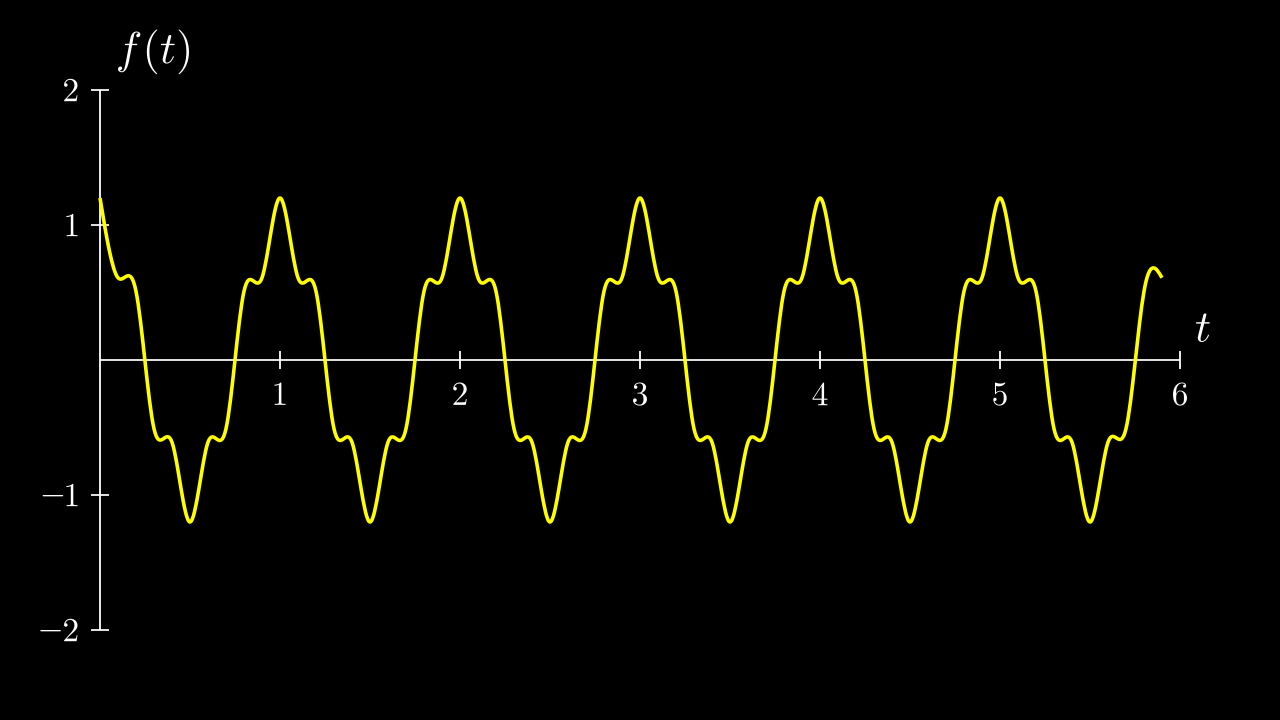

In [52]:
from manim import *

class TimeDomainPlot(Scene):
    def construct(self):
        # Define the function to be transformed
        func = lambda t: np.cos(1 * TAU * t) + np.cos(5 * TAU * t) * 0.2
        axes = Axes(
            x_range=[0, 6],
            y_range=[-2, 2],
            axis_config={"include_numbers": True},
            tips=False,
        )
        labels = axes.get_axis_labels(x_label="t", y_label="f(t)")
        # Plot the function
        graph = axes.plot(func, [0, 6 - SMALL_BUFF], color=YELLOW)
        self.add(axes, graph, labels)
    

%manim -qm -v WARNING TimeDomainPlot


Manim Community v0.18.1

[...]/lib/python3.12/site-packages/scipy/integrate/_quadpack_py.py:441: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  re_retval = quad(refunc, a, b, args, full_output, epsabs,


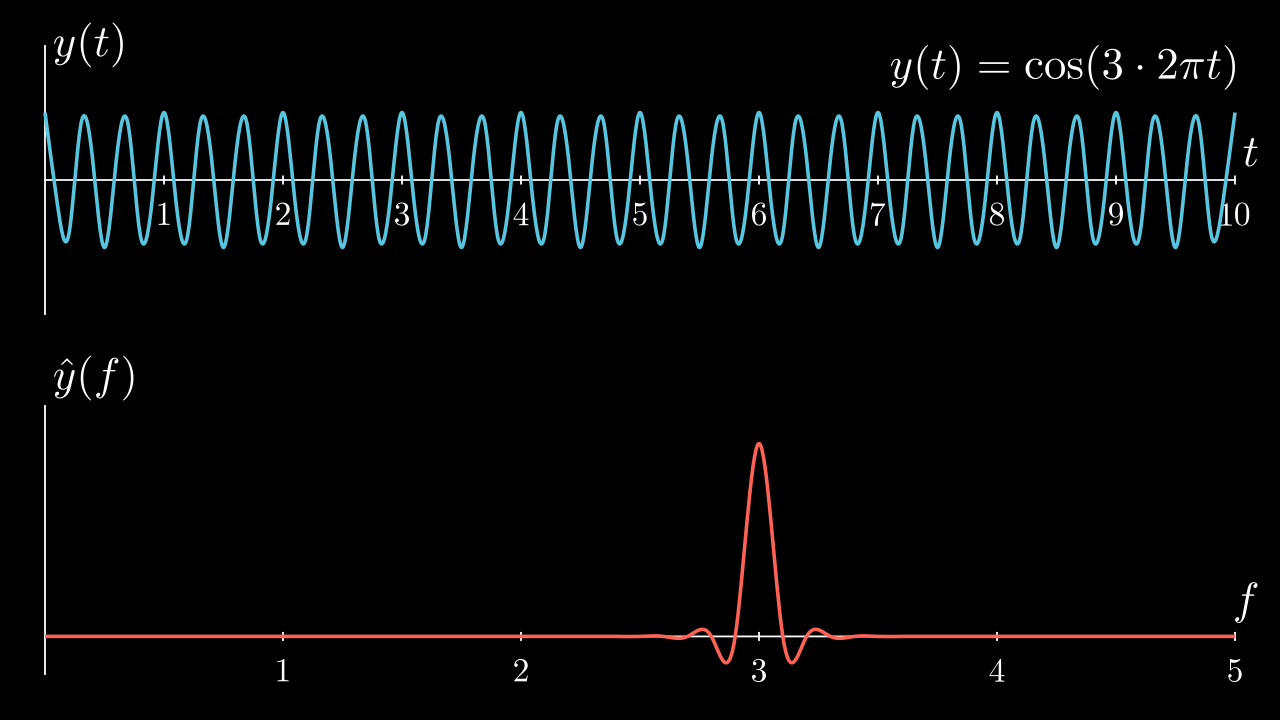

In [46]:
from manim import *
import numpy as np


class FourierTransformBasis(Scene):
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)
        self.frequencies = [0.5, 1, 1.5, 2, 2.5, 3]
        

    def construct(self):
        # Define the time-domain signal
        t_min, t_max = 0, 10  # Time range
        dead_signal = lambda _: 0
        
        # Axes for time-domain signal
        time_axes = Axes(
            x_range=[t_min, t_max, 1],
            y_range=[-2, 2, 0.5],
            y_axis_config={"include_ticks": False},
            tips=False,
        )
        time_axes.stretch_to_fit_height(3)
        time_axes.stretch_to_fit_width(config.frame_width - LARGE_BUFF)
        time_axes.to_corner(UL)
        time_axes_labels = time_axes.get_axis_labels(x_label="t", y_label="y(t)")
        time_axes.get_x_axis().add_numbers()
        dead_time_graph = time_axes.plot(dead_signal, color=BLUE)

        # Axes for frequency-domain (spectrum)
        freq_axes = Axes(
            x_range=[0, 5, 1],
            y_range=[-0.1, 0.6, 0.2],
            y_axis_config={"include_ticks": False},
            tips=False,
        )
        freq_axes.stretch_to_fit_height(3)
        freq_axes.stretch_to_fit_width(config.frame_width - LARGE_BUFF)
        freq_axes.next_to(time_axes, DOWN, buff=LARGE_BUFF).to_edge(LEFT)
        freq_axes_labels = freq_axes.get_axis_labels(
            x_label="f", y_label="\\hat{y}(f)"
        )
        freq_axes.get_x_axis().add_numbers()
        dead_freq_graph = freq_axes.plot(dead_signal, color=RED)

        
        formula = MathTex("y(t) = 0").to_corner(UR)

        self.play(Create(time_axes), Write(time_axes_labels),
                  Create(freq_axes), Write(freq_axes_labels))
        self.play(Create(dead_time_graph), Create(dead_freq_graph), Write(formula))
        self.wait(1)

        time_graphs = [dead_time_graph]
        freq_graphs = [dead_freq_graph]
        formulas = [formula]

        for freq in self.frequencies:

            signal = lambda t: np.cos(TAU * freq * t)
            signal_graph = time_axes.plot(signal, color=BLUE)
            ft = fourier_transform(signal, t_min, t_max, True)
            ft_graph = freq_axes.plot(ft, color=RED)
            formula = MathTex(f"y(t) = \\cos({freq}\\cdot2\\pi t)").to_corner(UR)
            
            self.play(ReplacementTransform(time_graphs[-1], signal_graph), 
                      ReplacementTransform(freq_graphs[-1], ft_graph),
                      FadeOut(formulas[-1]),
                      FadeIn(formula)
                      )
            self.wait(0.5)    
            
            time_graphs.append(signal_graph)
            freq_graphs.append(ft_graph)
            formulas.append(formula)

        self.wait(2)

%manim -v WARNING -qm -s FourierTransformBasis

Manim Community v0.18.1

[...]/lib/python3.12/site-packages/scipy/integrate/_quadpack_py.py:441: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  re_retval = quad(refunc, a, b, args, full_output, epsabs,


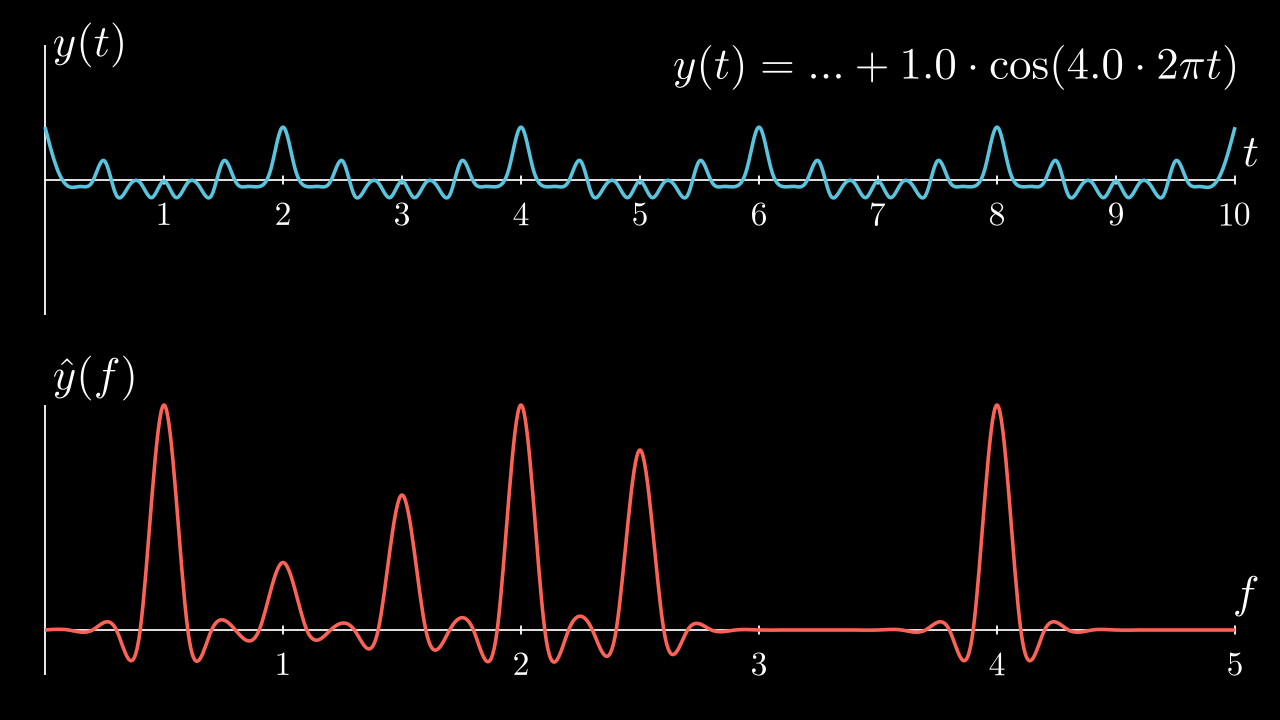

In [47]:
class IterativeFourierDecomposition(Scene):
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)
        self.compositions = [ # they don't need to be incremental
            (0.5,),
            (0.5, 1),
            (0.5, 1, 1.5),
            (0.5, 1, 1.5, 2),
            (0.5, 1, 1.5, 2, 2.5),
            (0.5, 1, 1.5, 2, 2.5, 4),
        ]
        self.amplitudes = [
            (1,),
            (1, 0.3), 
            (1, 0.3, 0.6),
            (1, 0.3, 0.6, 1),
            (1, 0.3, 0.6, 1, 0.8),   
            (1, 0.3, 0.6, 1, 0.8, 1),
        ]
        self.descriptions = [
            "y(t) = \\cos(0.5\\cdot2\\pi t)",
            "y(t) = ... + 0.3\\cdot\\cos(1.0\\cdot2\\pi t)",
            "y(t) = ... + 0.6\\cdot\\cos(1.5\\cdot2\\pi t)",
            "y(t) = ... + 1.0\\cdot\\cos(2.0\\cdot2\\pi t)",
            "y(t) = ... + 0.8\\cdot\\cos(2.5\\cdot2\\pi t)",
            "y(t) = ... + 1.0\\cdot\\cos(4.0\\cdot2\\pi t)",
        ]
        

    def construct(self):
        # Define the time-domain signal
        t_min, t_max = 0, 10  # Time range
        dead_signal = lambda _: 0
        
        # Axes for time-domain signal
        time_axes = Axes(
            x_range=[t_min, t_max, 1],
            y_range=[-2, 2, 0.5],
            y_axis_config={"include_ticks": False},
            tips=False,
        )
        time_axes.stretch_to_fit_height(3)
        time_axes.stretch_to_fit_width(config.frame_width - LARGE_BUFF)
        time_axes.to_corner(UL)
        time_axes_labels = time_axes.get_axis_labels(x_label="t", y_label="y(t)")
        time_axes.get_x_axis().add_numbers()
        dead_time_graph = time_axes.plot(dead_signal, color=BLUE)

        # Axes for frequency-domain (spectrum)
        freq_axes = Axes(
            x_range=[0, 5, 1],
            y_range=[-0.1, 0.5, 0.2],
            y_axis_config={"include_ticks": False},
            tips=False,
        )
        freq_axes.stretch_to_fit_height(3)
        freq_axes.stretch_to_fit_width(config.frame_width - LARGE_BUFF)
        freq_axes.next_to(time_axes, DOWN, buff=LARGE_BUFF).to_edge(LEFT)
        freq_axes_labels = freq_axes.get_axis_labels(
            x_label="f", y_label="\\hat{y}(f)"
        )
        freq_axes.get_x_axis().add_numbers()
        dead_freq_graph = freq_axes.plot(dead_signal, color=RED)

        
        formula = MathTex("y(t) = 0").to_corner(UR)

        self.play(Create(time_axes), Write(time_axes_labels),
                  Create(freq_axes), Write(freq_axes_labels))
        self.play(Create(dead_time_graph), Create(dead_freq_graph), Write(formula))
        self.wait(1)

        time_graphs = [dead_time_graph]
        freq_graphs = [dead_freq_graph]
        formulas = [formula]

        for composition, amplitude, description in zip(self.compositions, self.amplitudes, self.descriptions):
            signal = lambda t: np.sum([np.cos(TAU * freq * t) * amp for freq, amp in zip(composition, amplitude)])
            signal_graph = time_axes.plot(lambda t: signal(t) / len(composition), color=BLUE)
            ft = fourier_transform(signal, t_min, t_max, True)
            ft_graph = freq_axes.plot(ft, color=RED)
            formula = MathTex(description).to_corner(UR)
            
            self.play(ReplacementTransform(time_graphs[-1], signal_graph), 
                      ReplacementTransform(freq_graphs[-1], ft_graph),
                      FadeOut(formulas[-1]),
                      FadeIn(formula)
                      )
            self.wait(0.5)    
            
            time_graphs.append(signal_graph)
            freq_graphs.append(ft_graph)
            formulas.append(formula)

        self.wait(2)

%manim -v WARNING -qm -s IterativeFourierDecomposition